MSU-USDA Python Workshop

# Python for Data Science: Geographical Data

# Geographical Data

Being able to work with data that has a geographical component is an extremely important skill. GIS software is very common, but you can use also Python and a version of pandas called "Geopandas" to do analysis in which you align tabular data with geographical data.

Where Pandas has "Data Frames," geopandas has "Geographical Data Frames" that add one or more geometry columns or geoseries.

<img src="https://geopandas.org/en/stable/_images/dataframe.svg"></img>

So, if you're using GeoPandas, you'll usually have a normal pandas dataframe (dataframes are collections of pandas series) and you'll have one or more GeoPandas geoseries columns. 

The Geopandas site is here: https://geopandas.org/en/stable/

# I. Importing Libraries

First, let's import the libraries needed.

In [1]:
# Import the necessary libraries for Data Wrangling
import pandas as pd
import numpy as np

# Matplot Lib is for drawing plots, graphs, etc. and Seaborn is another package
# that makes matplotlib easier to use and create more attractive graphics
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg 
import seaborn as sns 

# Import geopandas
import geopandas as gpd


# II. Loading a ShapeFile

Most of the time you'll probably start a geo-analysis with some kind of shapefile. Three components are mandatory: 
- a main file that contains the feature geometry (.shp),
- an index file that stores the index of the feature geometry (.shx), and
- a dBASE table (.dbf) that stores the attribute information of features.

This lab will use data from the [Mississippi Automated Resource Information System (MARIS)](https://maris.mississippi.edu/HTML/Data.html) website that contains shapefiles for many things.

Other states in the US have great geoportals too. Take [California's site](https://gis.data.ca.gov/), for example: 

Let's load the Mississippi congressional district shapefile. 

In [2]:
# load the file
msCongress = gpd.read_file("data/MS_CongressionalDistricts_2022/MS_CongressionalDistricts_2022.shp")

# check it out just like you would with pandas
msCongress.shape

C:\Users\kerrie\anaconda3\envs\pyworkshop\Lib\site-packages\pyogrio\core.py:26: RuntimeWarning: Could not detect GDAL data files.  Set GDAL_DATA environment variable to the correct path.
  _init_gdal_data()


(4, 23)

Notice that there are 4 rows. Mississippi has four congressional districts, so that makes sense.

Let's look at the data.

In [3]:
msCongress.head(4)

,ID,AREA,DISTRICT,MEMBERS,LOCKED,NAME,POPULATION,WHITE,BLACK,F18_POP,...,DEVIATION,F_DEVIATIO,F_WHITE,F_BLACK,F_18_POP,F_18_WHT,F_18_BLK,MULTIPLE_F,DISTRICT_L,geometry
0,1,10096.88,2801,1.0,None,Trent Kelly,740319,483849,202327,570086,...,-1.0,-0.0,0.6536,0.2733,0.7701,0.6751,0.2632,2801|740319|26.32%,2801|-0%,"POLYGON ((634634.996 1388344.465, 634617.019 1..."
1,2,18413.48,2802,1.0,None,Bennie Thompson,740319,238483,468074,571715,...,-1.0,-0.0,0.3221,0.6323,0.7723,0.3482,0.6105,2802|740319|61.05%,2802|-0%,"POLYGON ((472223.111 1307531.387, 472198.844 1..."
2,3,11830.83,2803,1.0,None,Michael Guest,740320,442249,244759,568068,...,0.0,0.0,0.5974,0.3306,0.7673,0.6202,0.3179,2803|740320|31.79%,2803|0%,"POLYGON ((434276.811 1308397.064, 434276.86 13..."
3,4,8121.62,2804,1.0,None,Steven Palazzo,740321,494312,169321,567730,...,1.0,0.0,0.6677,0.2287,0.7669,0.6914,0.2171,2804|740321|21.71%,2804|0%,"POLYGON ((502089.331 1133959.147, 502189.018 1..."


Each row is a different congressional district and you can see normal tabular data such as the name of the congressional representative on each row. 

Scroll to the right and check out the "geometry" column. It contains a polygon defined by as many points as it takes to describe the shape of the district. Since there was just one geometry column, geopandas made that one the "active geometry column." You can have more than one column that contains geometry, but only one active at a time. That list of points looks weird and it doesn't look like latitude and longitude. That's because it is using a state projection system.

# III. Projections

Every map has a projection; it's how we take something on a spherical earth and flatten it out. Let's see which projection our data from MARIS uses:

In [4]:
# .crs for 'coordinate reference system'
msCongress.crs

<Projected CRS: EPSG:3814>
Name: NAD83 / Mississippi TM
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: United States (USA) - Mississippi.
- bounds: (-91.65, 30.01, -88.09, 35.01)
Coordinate Operation:
- name: Mississippi Transverse Mercator
- method: Transverse Mercator
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

Notice that it's called EPSG:3814 (first line).

The Coordinate Reference System (CRS) tells GeoPandas where the coordinates of the geometries are located on the earth’s surface. In some cases, the CRS is geographic, which means that the coordinates are in latitude and longitude.

NAD83 (second line) is the national reference system used for georeferencing by most federal and provincial/state agencies in Canada and the U.S. 

A more common one you'll experience in other data is WGS84 - the default "native" system used by the Global Positioning System (GPS) and commercial GPS receivers.

Finally, a very important thing, is that the projection uses meters for distance (Axis Info).

# IV. Visualizing the Plot

Let's visualize the districts and color code them by that "AREA" column.

<Axes: >

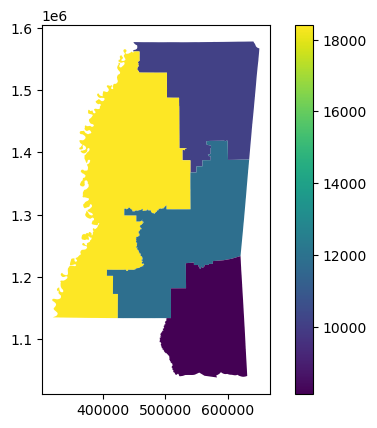

In [5]:
msCongress.plot("AREA", legend=True)

Hey, that looks just like Mississsippi. We just have loaded the correct file and everything geographical is in square meters and it uses the state reference system.

We could change the coordinate reference system to the more common one used by GPS (4326).

<Axes: >

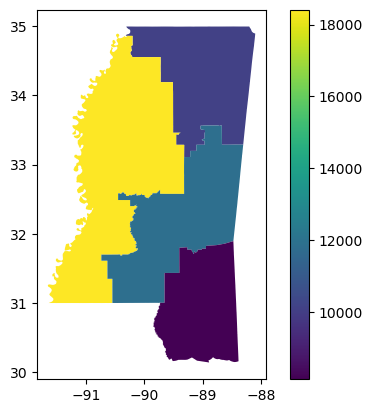

In [6]:
# convert the CRS
msCongress = msCongress.to_crs("EPSG:4326")

# show it again
msCongress.plot("AREA", legend=True)

In [7]:
# what does the CRS look like?
msCongress.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

Notice that the Axis info is in degrees now, not meters. We went from rectangular to polar coordinates, essentially.

In [8]:
# Let's see the data
msCongress

,ID,AREA,DISTRICT,MEMBERS,LOCKED,NAME,POPULATION,WHITE,BLACK,F18_POP,...,DEVIATION,F_DEVIATIO,F_WHITE,F_BLACK,F_18_POP,F_18_WHT,F_18_BLK,MULTIPLE_F,DISTRICT_L,geometry
0,1,10096.88,2801,1.0,None,Trent Kelly,740319,483849,202327,570086,...,-1.0,-0.0,0.6536,0.2733,0.7701,0.6751,0.2632,2801|740319|26.32%,2801|-0%,"POLYGON ((-88.30443 33.28832, -88.30463 33.288..."
1,2,18413.48,2802,1.0,None,Bennie Thompson,740319,238483,468074,571715,...,-1.0,-0.0,0.3221,0.6323,0.7723,0.3482,0.6105,2802|740319|61.05%,2802|-0%,"POLYGON ((-90.04584 32.56758, -90.0461 32.5680..."
2,3,11830.83,2803,1.0,None,Michael Guest,740320,442249,244759,568068,...,0.0,0.0,0.5974,0.3306,0.7673,0.6202,0.3179,2803|740320|31.79%,2803|0%,"POLYGON ((-90.45004 32.57378, -90.45004 32.573..."
3,4,8121.62,2804,1.0,None,Steven Palazzo,740321,494312,169321,567730,...,1.0,0.0,0.6677,0.2287,0.7669,0.6914,0.2171,2804|740321|21.71%,2804|0%,"POLYGON ((-89.72812 31.0023, -89.72708 31.0023..."


That geometry column is looking much more like we'd expect - a set of latitude/longitude pairs for the points.

# V. Calculating Area

Geopandas makes it easy to find the area of any geometry. 

What's the area of each district? Let's pretend there wasn't already an "AREA" column and see how easy it is to calculate it. We can add a column that contains it.

GeoDataFrame.area is just GeoSeries.area applied to the active geometry column.

In [ ]:
msCongress["calculatedArea"] = msCongress.area


Oh wow, we got our first projection warning. Right now we're still in EPSG:4326 which is all about geography and mapping. We need to convert back to the coordinate system using rectangular coordinates (in meters, not degrees) before we can get accurate estimates of area.

In [ ]:
# convert back
msCongress = msCongress.to_crs("EPSG:3814")

# now we can try to calculate area again
msCongress["calculatedArea"] = msCongress.area

msCongress

Nice! No errors or warnings.

Do you see our new column, "calculatedArea"? Geopandas uses this projection's units (meters) for area and distance. The existing database had an informational column called AREA with a different number. Can you figure out what units it uses?

I think it uses square miles, even though the data dictionary says this is supposed to be square kilometers.

### Exercise 1: Units and Interpreting the Data

Answer the following questions; you won't need python for this:

In [ ]:
# a. What units are used by the file we downloaded from MARIS 
# for the area of each congressional district?
# Put Answer Here: 

# b. Which member of congress serves the largest geographical district?
# Put Answer Here: 

# c. Do a google search and figure out why geopandas gave us that warning 
# "Geometry is in a geographic CRS. Results from 'area' are likely incorrect."
# Why does it make a difference?
# Put Answer Here: 

# VI. Centroids

A "centroid" is the point at the center of a geometric shape. Very often if you're dealing with geographical data you need a point to define so you can calculate distances relative to it. For example, the centroid of county is a good way to figure out how central some other point is relative to it.

Let's add a column with the centroid of each district.


In [ ]:
# add centroid column
msCongress['centroid'] = msCongress.centroid

# let's view two columns - our district number and its centroid
#
# look at this cool loc syntax
# we're saying give me all the rows min:max, if just ":" it means everything.
# if we had put 1:3 it would be the range of rows from 1 to 3
# and then we said, just give us the two columns ID and distance.
msCongress.loc[:, ['ID', 'centroid']]


So, the Mississippi 2nd district has a centroid at point 434797.571, 1348954.177.

# VII. Calculating Distance

For each district, let's figure out how far its centroid is from the centroid of District 1.


In [ ]:
# get the centroid point where index is 0
centroidOfDistrict1 =  msCongress['centroid'].iloc[0]

# add a column that, for each row, contains distance between that
# row's centroid and the centroid of the first district.
msCongress['distance'] = msCongress['centroid'].distance(centroidOfDistrict1)

# show the district ID and our distance column
msCongress.loc[:, ['ID', 'distance']]

Perfect - we can see that the distance between district one's centroid and itself is 0. That makes sense.

The center of MS four (ID=4) is the farthest from MS one (ID=1).

# VIII. Showing Boundaries

Let's calculate the boundary of each district. A boundary is a line, unlike a polygon which is a shape. Boundaries don't even have to connect to form a continuous loop.


In [ ]:
msCongress['boundary'] = msCongress.boundary

msCongress

The boundary is saved as a "line string" and now our geodata frame has two geometry columns. The difference between a line string and the polygon of the original geometry column is that line strings may or may not connect to form an enclosed area. In this case they are equivalent since our line represents the county's polygon.

# IX. Different Geometries

What if we just want to plot the centroids? We need to tell geopandas which column to use for geometry.

In [ ]:
msCongress = msCongress.set_geometry("centroid")
msCongress.plot("AREA", legend=True)

We could also plot two geometries together. For example, the centroid and the shapes. In this case the shapes of the districts will be an "axis" for the points.

In [ ]:
shapes = msCongress["geometry"].plot(figsize=(10, 10))

msCongress["centroid"].plot(ax=shapes, color="black", figsize=(10, 10))


# X. Creating a Buffer Geometry

How about we buffer our centroids so that they extend out 10,000 meters in all directions? Maybe we are trying to figure out a fuzzy boundary where we want the policians in each district to overlap in their concerns. But a more realistic scenario would be to figure out what businesses are within a certain distance from a river, so you can build a buffer.

In [ ]:
# Let's set our geometry column back to the shapes
msCongress = msCongress.set_geometry("geometry")

# buffering the active geometry by 10,000 meters 
msCongress["buffered"] = msCongress.buffer(10000)

# buffering the centroid geometry by 30,000 meters
msCongress["buffered_centroid"] = msCongress["centroid"].buffer(30000)

# saving the first plot as an axis and setting alpha (transparency) to 0.5
ax = msCongress["buffered"].plot(alpha=.5, figsize=(15, 15))  

# passing the first plot as an axis to the second
msCongress["buffered_centroid"].plot(ax=ax, color="red", alpha=.5, figsize=(15, 15))  

# passing the first plot and setting linewitdth to 0.5
# and we can use the boundary now that we created above
msCongress["boundary"].plot(ax=ax, color="white", linewidth=.5, figsize=(15, 15))  

# Let's put the number of the district as a label using .apply to
# stick the label as an annotation in the centroid location for each 
# district
msCongress.apply(lambda x: ax.annotate(text=x['ID'], xy=x.geometry.centroid.coords[0], ha='center'), axis=1);

# XI. Finding Relationships Between Geographies

Let's see if one of our districts overlaps any other buffered districts (e.g., is within 10,000 meters of another district).

In [ ]:
# grab out district 2

# remember that the index of district 2 is "1". "2" is in the ID column but
# that's not the index
district2 = msCongress.loc[1, "geometry"]
district2

In [ ]:
# use the geopandas "intersects" method to see
# if any of the buffered districts intersects 
# district 2
msCongress["buffered"].intersects(district2)

Cool, right? We can see that 1,2, and 3 intersect 2, but 2 doesn't intersect the fourth congressional district.

## Using Two Geo DataFrames

Let's now load up information on communication infrastructure. In this case, cell towers. This data was updated in 2024 and came from the [MARIS page](https://maris.mississippi.edu/HTML/DATA/data_UtilityTelecom/FCCCellTowers.html).

In [ ]:
msCellTowers = gpd.read_file("data/MS_CellTowers_2024/MS_CellTowers_2024.shp")

msCellTowers

Let's check to be sure the towers are in the same coordinate system as our districts.

In [ ]:
msCellTowers.crs


Nice, EPSG:3814 is exactly what we're using with our congressional districts.
    
First, let's plot our cell towers together with our congressional districts and boundaries.

In [ ]:
# saving the first plot as an axis and setting alpha (transparency) to 0.5
ax = msCongress["geometry"].plot(alpha=.5, figsize=(15, 15))  

# passing the first plot as an axis to the second
msCellTowers["geometry"].plot(ax=ax, color="black", alpha=.5, figsize=(15, 15))  

# passing the first plot and setting linewitdth to 0.5
# and we can use the boundary now that we created above
msCongress["boundary"].plot(ax=ax, color="white", linewidth=.5, figsize=(15, 15))  

# Let's put the number of the district as a label using .apply to
# stick the label as an annotation in the centroid location for each 
# district
msCongress.apply(lambda x: ax.annotate(text=x['ID'], xy=x.geometry.centroid.coords[0], ha='center'), axis=1);

## Counting Things in Things

Let's find geographical things in things.

How many cell towers are in district two?

Well, let's add a column and figure that out.

In [ ]:
msCellTowers['isInDistrictTwo'] = msCellTowers["geometry"].intersects(district2)

msCellTowers

Cool, we have a column. Let's use it to find out how many we have in district 2. That is, for how many rows is there a "true" in the "isInDistrictTwo" column?

In [ ]:
numInTwo = msCellTowers.query("isInDistrictTwo == True").shape[0]

print(f"There are {numInTwo} cell towers in District Two")

# Exercise 2: Putting it All Together

In [ ]:
## Exercise 2: Putting it All Together

# STATE SHAPE
# Visit this page on the MARIS site: 
# https://maris.mississippi.edu/HTML/DATA/Boundaries.html#gsc.tab=0
# and choose the state boundary file

# a. download it, load it up here with geopandas

# b. Show the CRS

# c. display a plot of it. This should just be the MS state boundary.

# d. calculate the area of MS and output this here with proper units
# e.g., "Mississippi is [X] square [units]"

# d.2 does this value make sense when comparing with online info?
# put answer here: 

# e. create a column that has the outline of MS

# SUB-BOUNDARIES
# On the same web page, download a sub-boundary of your choice from
# something that has districts or subdivisions. Examples would include
# courts, wildlife, tribal boundaries, zip codes, etc.
# Note: in the video, your instructor chose zip codes

# f. Type here which one you chose: 

# g. download it, load it up here with geopandas

# h. Show its CRS and make sure it is the same as the state boundary

# i. display a plot of it on top of the *outline* of Mississippi and
# put a label in the centroid of each sub-divided shape

# j. add a column to your sub-boundary dataframe that contains the centroid
# of each thing and print out the name of the thing and its centroid column

# FEATURES OR INFRASTRUCTURE
# Go to this page on the MARIS site: 
# https://maris.mississippi.edu/HTML/DATA/Utility.html#gsc.tab=0
# Choose something other than the location of cell towers
# and download the file.
# Note: in the video, your instructor chose power plants

# k. Type here which one you chose: 

# l. Download it, load it up here with geopandas

# m. Show its CRS and make sure it is the same as the state boundary

# n. Display a plot of it on top of the outline of Mississippi and on top of
# the shapes of your subdivision.

# o. Add a column to your sub-boundary dataframe that, for each "thing" 
# in your sub-boundaries (zip codes, court districts, tribal lands, etc.)
# you record the number of infrastructure things intersecting that sub-boundary

# p. Output which of your subdivisions contains the most of the things in your
# feature or infrastructure data set? 


# XII. What to Learn Next

Generally, what you'll need to try next is taking a normal dataframe that has latitude and longitude columns. Then, you can convert this into a geopandas dataframe. Then, since lattitude and longitude are polar coordinates, you'll just assign a CRS to it (EPSG:4326). Then, you'll use to_crs() to convert that frame into rectangular coordinates (EPSG:3814) for more calculations. That's it. You don't have to start from shapefiles.